In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [8]:
df = pd.read_csv('../../data/processed/VesselTrip.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60897 entries, 0 to 60896
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        60897 non-null  int64  
 1   MMSI              60897 non-null  int64  
 2   TripIndex         60897 non-null  int64  
 3   TimeTripStart     60897 non-null  int64  
 4   TimeTripLength    60897 non-null  int64  
 5   StartLat          60897 non-null  float64
 6   StartLon          60897 non-null  float64
 7   EndLat            60897 non-null  float64
 8   EndLon            60897 non-null  float64
 9   furthestLat       60897 non-null  float64
 10  furthestLon       60897 non-null  float64
 11  SOG               60897 non-null  float64
 12  COG               60897 non-null  float64
 13  Heading           60897 non-null  float64
 14  VesselType        60897 non-null  float64
 15  TransceiverClass  60897 non-null  float64
 16  StartDockID       60897 non-null  int64 

In [9]:
# scale the values
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [10]:
clf = LocalOutlierFactor()
pred = clf.fit_predict(scaled_X)

In [11]:
# see the frequence of each predicted label
pd.Series(pred).value_counts()

 1    55035
-1     5862
dtype: int64

In [12]:
# demension reduction with PCA so we can make plot
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaled_X)

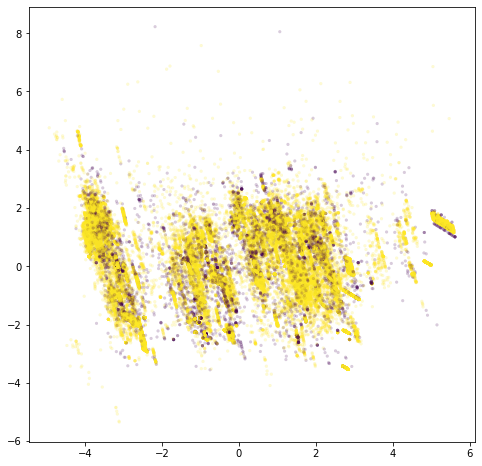

In [13]:
# plot the data
plt.figure(figsize=(8, 8))
plt.scatter(x=pca_X[:, 0], y=pca_X[:, 1], marker='.', linewidth=0.1, alpha=0.2, c=pred)